In [4]:
library("MASS")
# library("ordinal")

df = read.csv("~/Downloads/20241217 October 2024 survey.csv")

nz_groups <- c("Strongly oppose", "Tend to oppose", "Neither oppose nor support", "Tend to support", "Strongly support")

# Predicting net zero support

## Compare predictors

In [2]:
olr_age <- polr(as.factor(Oct24Q19NetZerosupportnumeric) ~ Age, data = df, Hess = T)
pred_age <- predict(olr_age, newdata = data.frame(Age = 18:88), type = "probs")

olr_agegroups <- polr(as.factor(Oct24Q19NetZerosupportnumeric) ~ Agegroup, data = df)
pred_agegroups <- predict(olr_agegroups, newdata = data.frame(Agegroup = levels(as.factor(df$Agegroup))[2:7]), type = "probs")

In [3]:
summary(olr_age)

Call:
polr(formula = as.factor(Oct24Q19NetZerosupportnumeric) ~ Age, 
    data = df, Hess = T)

Coefficients:
        Value Std. Error t value
Age -0.009934   0.004229  -2.349

Intercepts:
    Value    Std. Error t value 
1|2  -2.7716   0.2458   -11.2755
2|3  -2.1228   0.2328    -9.1198
3|4  -1.3217   0.2235    -5.9123
4|5   0.0405   0.2195     0.1846

Residual Deviance: 2355.183 
AIC: 2365.183 
(132 observations deleted due to missingness)

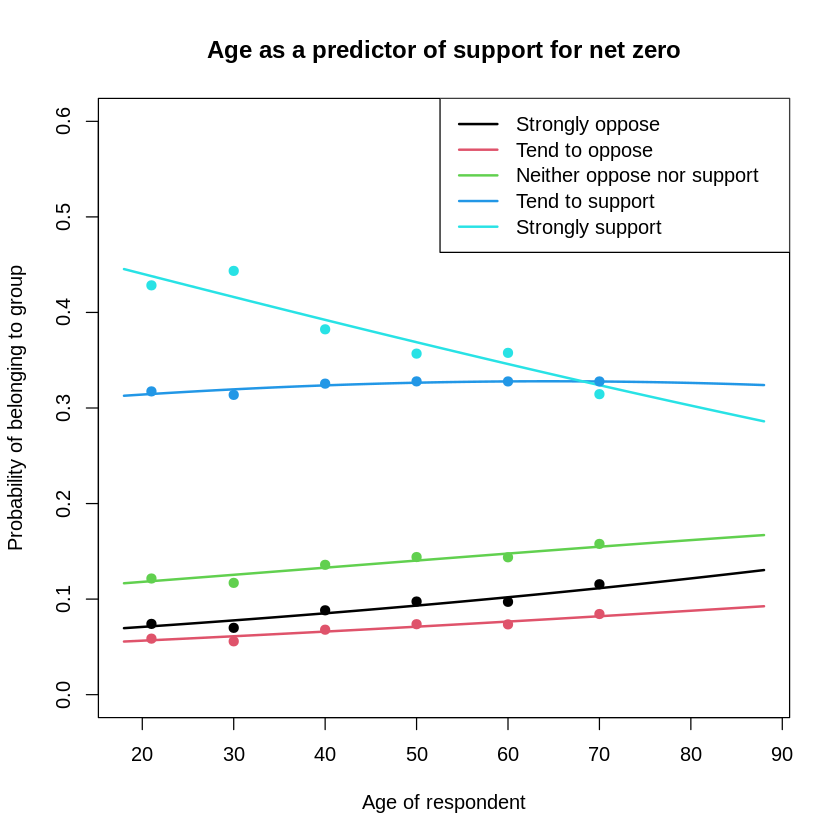

In [4]:
# ages vs age groups
matplot(18:88, pred_age, type = "l", lty = 1, lwd = 2, ylim = c(0,.6), 
        xlab = "Age of respondent", ylab = "Probability of belonging to group", main = "Age as a predictor of support for net zero")
matplot(c(21,30,40,50,60,70), pred_agegroups, pch = 19, col = 1:5, add = T)
legend("topright", lty = 1, lwd = 2, legend = nz_groups, col = 1:5)

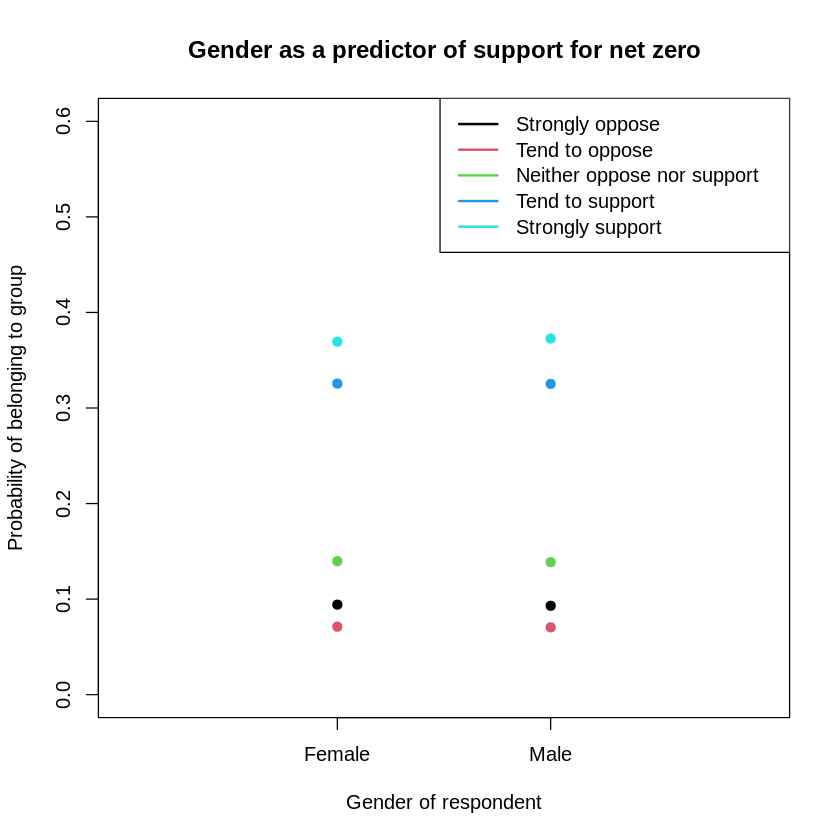

In [5]:
olr_sex <- polr(as.factor(Oct24Q19NetZerosupportnumeric) ~ Sex, data = df)
pred_sex <- predict(olr_sex, newdata = data.frame(Sex = c("Female", "Male")), type = "probs")
matplot(1:2, pred_sex, pch = 19, xlim = c(0,3), ylim = c(0,0.6), xaxt = "n",
        xlab = "Gender of respondent", ylab = "Probability of belonging to group", main = "Gender as a predictor of support for net zero")
axis(1, at = 1:2, labels = c("Female", "Male"))
legend("topright", lty = 1, lwd = 2, legend = nz_groups, col = 1:5)

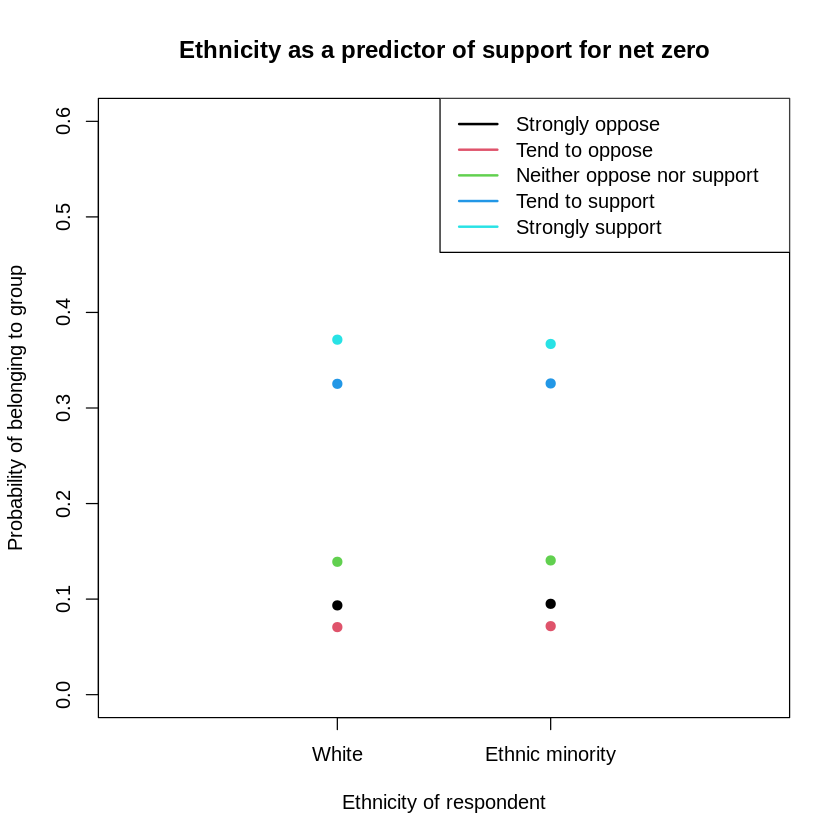

In [6]:
olr_eth <- polr(as.factor(Oct24Q19NetZerosupportnumeric) ~ Ethnicity_ethnic_minority, data = df)
pred_eth <- predict(olr_eth, newdata = data.frame(Ethnicity_ethnic_minority = c(0, 1)), type = "probs")
matplot(1:2, pred_eth, pch = 19, xlim = c(0,3), ylim = c(0,0.6), xaxt = "n",
        xlab = "Ethnicity of respondent", ylab = "Probability of belonging to group", main = "Ethnicity as a predictor of support for net zero")
axis(1, at = 1:2, labels = c("White", "Ethnic minority"))
legend("topright", lty = 1, lwd = 2, legend = nz_groups, col = 1:5)

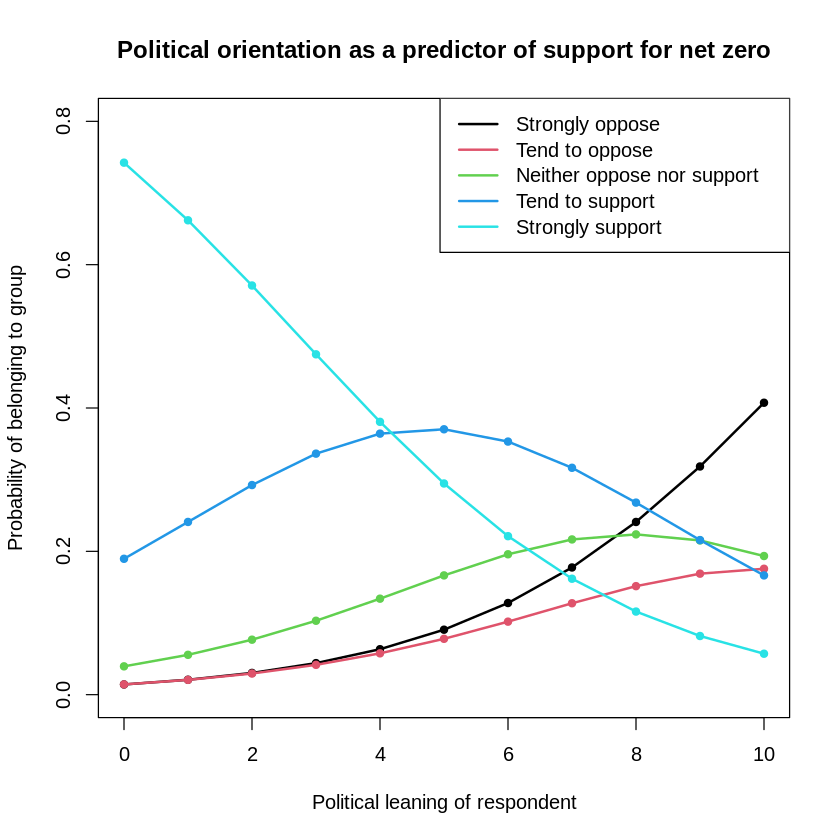

In [7]:
olr_ps <- polr(as.factor(Oct24Q19NetZerosupportnumeric) ~ Oct24Q31politicalspectrum, data = df)
pred_ps <- predict(olr_ps, newdata = data.frame(Oct24Q31politicalspectrum = 0:10), type = "probs")
matplot(0:10, pred_ps, pch = 20, type = "o", lty = 1, lwd = 2, ylim = c(0,0.8), 
        xlab = "Political leaning of respondent", ylab = "Probability of belonging to group", main = "Political orientation as a predictor of support for net zero")
legend("topright", lty = 1, lwd = 2, legend = nz_groups, col = 1:5)

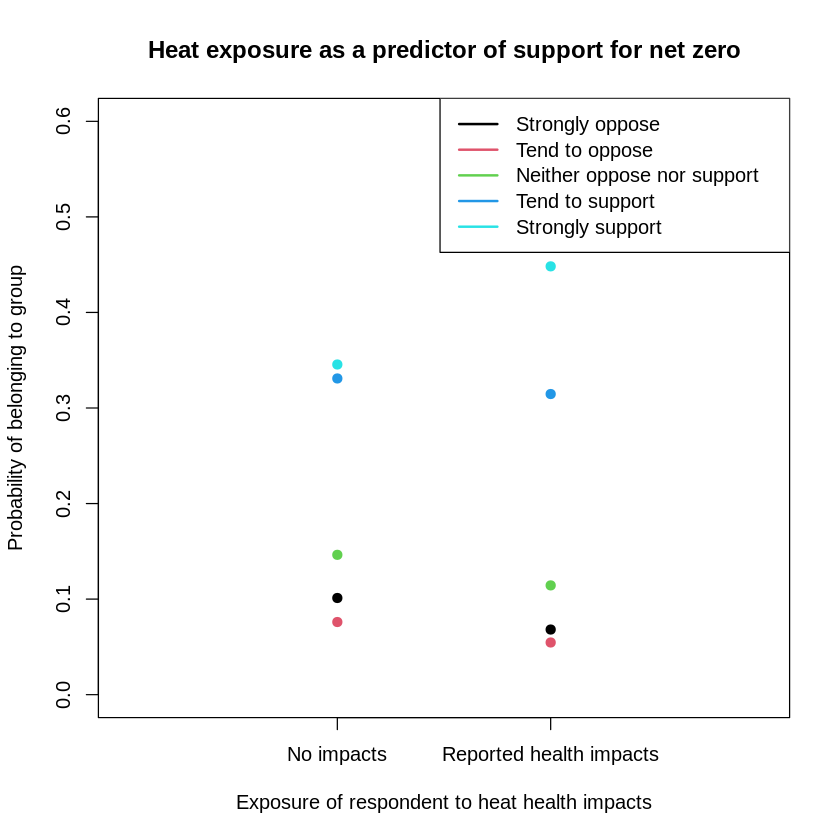

In [8]:
olr_hi <- polr(as.factor(Oct24Q19NetZerosupportnumeric) ~ Oct24Q15ExperienceHealthImpactsYes, data = df)
pred_hi <- predict(olr_hi, newdata = data.frame(Oct24Q15ExperienceHealthImpactsYes = 0:1), type = "probs")
matplot(1:2, pred_hi, pch = 19, xlim = c(0,3), ylim = c(0,0.6), xaxt = "n",
        xlab = "Exposure of respondent to heat health impacts", ylab = "Probability of belonging to group", main = "Heat exposure as a predictor of support for net zero")
axis(1, at = 1:2, labels = c("No impacts", "Reported health impacts"))
legend("topright", lty = 1, lwd = 2, legend = nz_groups, col = 1:5)

## Relationships between predictors

In [9]:
# age as a predictor of reported health impacts
olr_hibyage <- glm(as.factor(Oct24Q15ExperienceHealthImpactsYes) ~ Age, family = binomial(link = 'logit'), data = df)
pred_hibyage <- predict(olr_hibyage, newdata = data.frame(Age = 18:88), type = "response")

olr_hibyagegroup <- glm(as.factor(Oct24Q15ExperienceHealthImpactsYes) ~ Agegroup, family = binomial(link = 'logit'), data = df)
pred_hibyagegroup <- predict(olr_hibyagegroup, newdata = data.frame(Agegroup = levels(as.factor(df$Agegroup))[2:7]), type = "response")

tbl <- table(df[,c("Oct24Q15ExperienceHealthImpactsYes", "Agegroup")])
tbl <- t(sweep(tbl, 2, colSums(tbl), "/"))

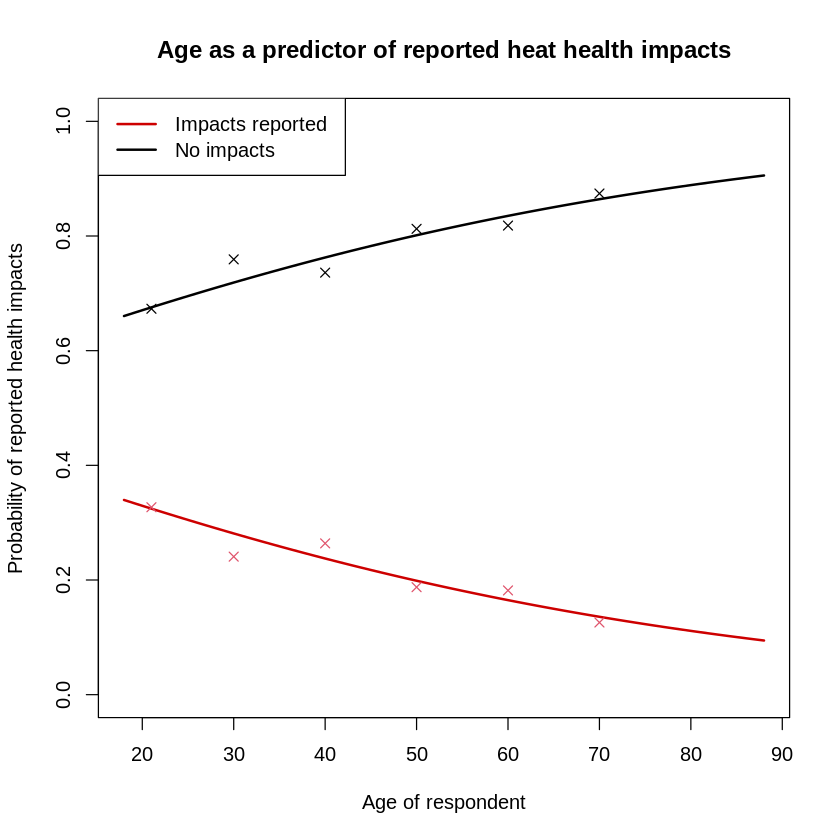

In [10]:
plot(18:88, pred_hibyage, type = "l", lwd = 2, ylim = c(0,1), col = "red3",
     xlab = "Age of respondent", ylab = "Probability of reported health impacts", main = "Age as a predictor of reported heat health impacts")
lines(18:88, 1-pred_hibyage, type = "l", lwd = 2, col = "black")

# points(c(21,30,40,50,60,70), pred_hibyagegroup, col = "red3", pch = 19)
# points(c(21,30,40,50,60,70), 1-pred_hibyagegroup, col = "black", pch = 19)

matplot(c(21,30,40,50,60,70), tbl[-1,], add = T, pch = 4)  # observed proportions

legend("topleft", col = c("red3", "black"), lwd = 2, legend = c("Impacts reported", "No impacts"))

In [11]:
# political views as a predictor of reported health impacts
olr_hibyps <- glm(as.factor(Oct24Q15ExperienceHealthImpactsYes) ~ Oct24Q31politicalspectrum, family = binomial(link = 'logit'), data = df)
pred_hibyps <- predict(olr_hibyps, newdata = data.frame(Oct24Q31politicalspectrum = 0:10), type = "response")

tbl <- table(df[,c("Oct24Q15ExperienceHealthImpactsYes", "Oct24Q31politicalspectrum")])
tbl <- t(sweep(tbl, 2, colSums(tbl), "/"))

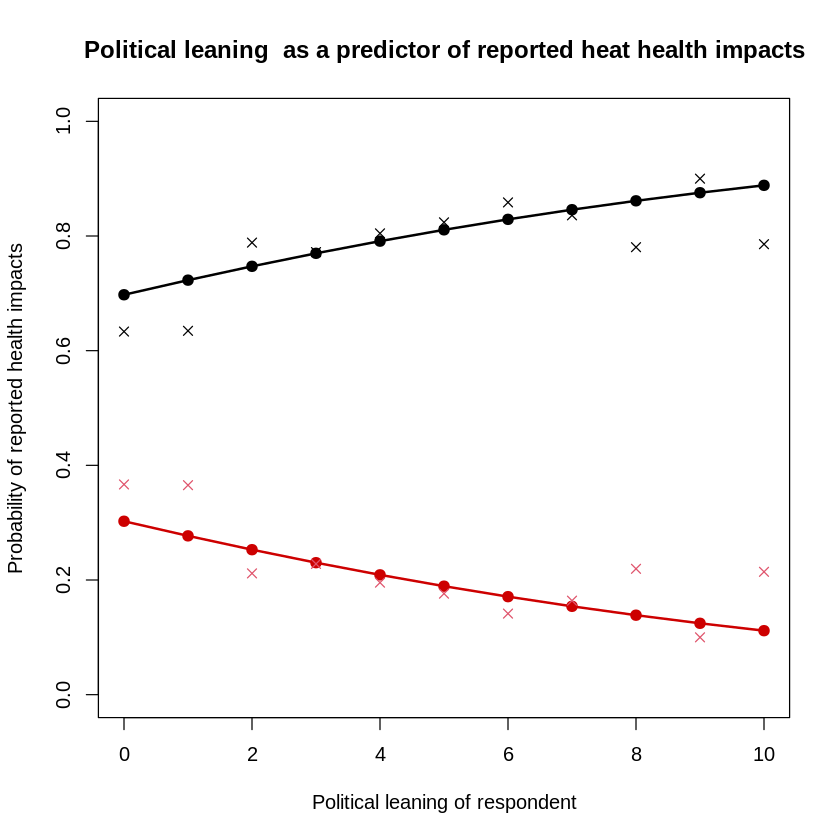

In [12]:
plot(0:10, pred_hibyps, type = "o", lwd = 2, pch = 19, ylim = c(0,1), col = "red3",
     xlab = "Political leaning of respondent", ylab = "Probability of reported health impacts", main = "Political leaning  as a predictor of reported heat health impacts")
lines(0:10, 1-pred_hibyps, type = "o", lwd = 2, pch = 19, col = "black")

matplot(0:10, tbl, add = T, pch = 4)  # observed proportions

In [13]:
# age as a predictor of political views
olr_psbyage <- polr(as.factor(Oct24Q31politicalspectrum) ~ Age, data = df)
pred_psbyage <- predict(olr_psbyage, newdata = data.frame(Age = 18:88), type = "probs")

tbl <- table(df[,c("Oct24Q31politicalspectrum", "Agegroup")])
tbl <- t(sweep(tbl, 2, colSums(tbl), "/"))

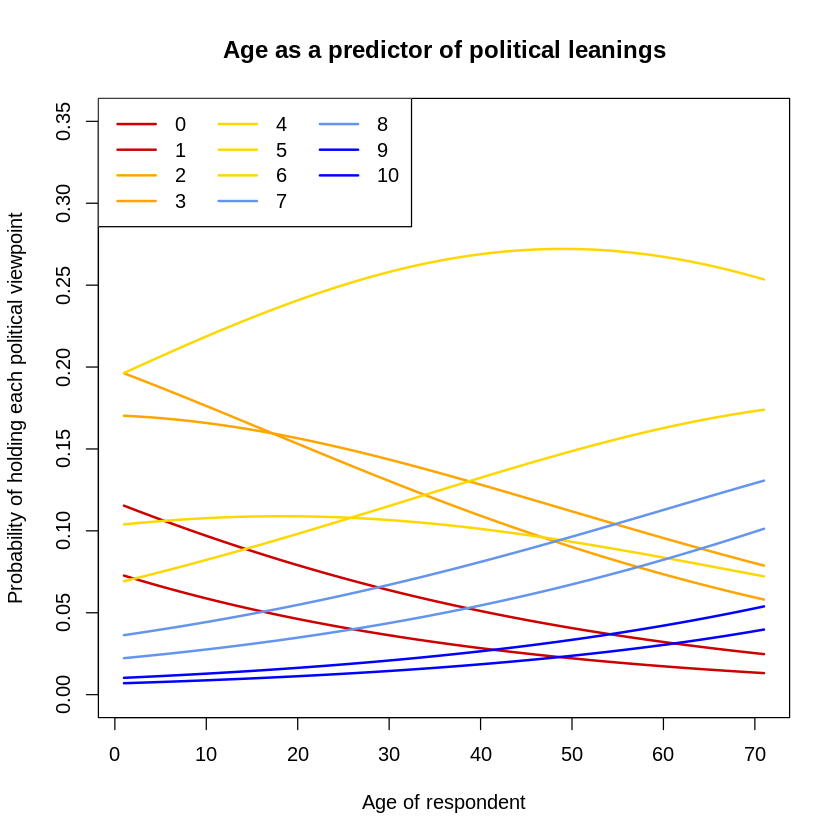

In [14]:
ps_cols = c(rep(c("red3", "orange"),each = 2), rep("gold", 3), rep(c("cornflowerblue", "blue"),each = 2))
matplot(pred_psbyage, type = "l", lty = 1, lwd = 2, col = ps_cols, ylim = c(0,0.35),
            xlab = "Age of respondent", ylab = "Probability of holding each political viewpoint", main = "Age as a predictor of political leanings")
legend("topleft", lty = 1, lwd = 2, col = ps_cols, legend = 0:10, ncol = 3)

## Fit and compare models

In [15]:
olr_all <- polr(as.factor(Oct24Q19NetZerosupportnumeric) ~ Oct24Q15ExperienceHealthImpactsYes + Age + Oct24Q31politicalspectrum, data = df, Hess = T)

olr_hiage <- polr(as.factor(Oct24Q19NetZerosupportnumeric) ~ Oct24Q15ExperienceHealthImpactsYes + Age, data = df, Hess = T)
olr_ageps <- polr(as.factor(Oct24Q19NetZerosupportnumeric) ~ Age + Oct24Q31politicalspectrum, data = df, Hess = T)
olr_pshi <- polr(as.factor(Oct24Q19NetZerosupportnumeric) ~ Oct24Q31politicalspectrum + Oct24Q15ExperienceHealthImpactsYes, data = df, Hess = T)

olr_hi <- polr(as.factor(Oct24Q19NetZerosupportnumeric) ~ Oct24Q15ExperienceHealthImpactsYes, data = df, Hess = T)
olr_age <- polr(as.factor(Oct24Q19NetZerosupportnumeric) ~ Age, data = df, Hess = T)
olr_ps <- polr(as.factor(Oct24Q19NetZerosupportnumeric) ~ Oct24Q31politicalspectrum, data = df, Hess = T)

In [16]:
models = list("all" = olr_all, "hi+age" = olr_hiage, "age+ps" = olr_ageps, "ps+hi" = olr_pshi, "hi" = olr_hi, "age" = olr_age, "ps" = olr_ps)

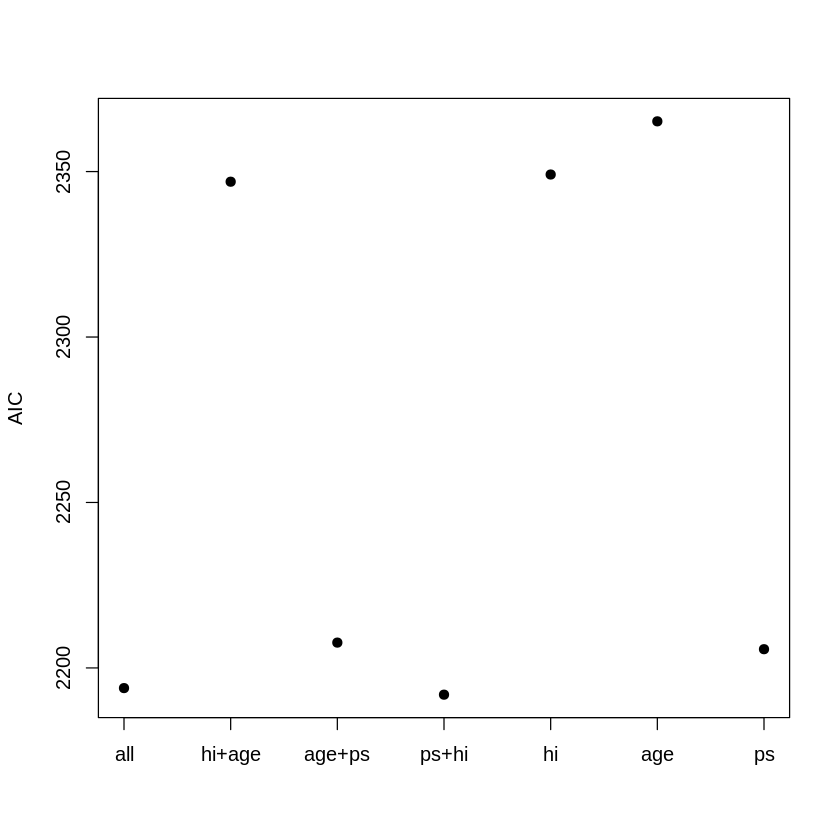

In [17]:
plot(sapply(models, AIC), xaxt = "n", pch = 19, xlab = "", ylab = "AIC")
axis(1, at = 1:7, labels = names(models))

In [18]:
coefficients <- summary(olr_pshi)$coefficients
coefficients <- cbind(coefficients, p_value = (1 - pnorm(abs(coefficients[ ,"t value"]), 0, 1))*2)
coefficients <- cbind(coefficients, odds_ratio = exp(coefficients[ ,"Value"]))
printCoefmat(coefficients[ ,c("Value", "Std. Error", "odds_ratio", "p_value")], P.values=TRUE, has.Pvalue=TRUE, dig.tst = 3)

                                       Value Std. Error odds_ratio  p_value    
Oct24Q31politicalspectrum          -0.380683   0.031989      0.683  < 2e-16 ***
Oct24Q15ExperienceHealthImpactsYes  0.301146   0.162897      1.351   0.0645 .  
1|2                                -4.151121   0.215358      0.016  < 2e-16 ***
2|3                                -3.437261   0.195197      0.032  < 2e-16 ***
3|4                                -2.527323   0.176735      0.080  < 2e-16 ***
4|5                                -0.954771   0.157134      0.385 1.23e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


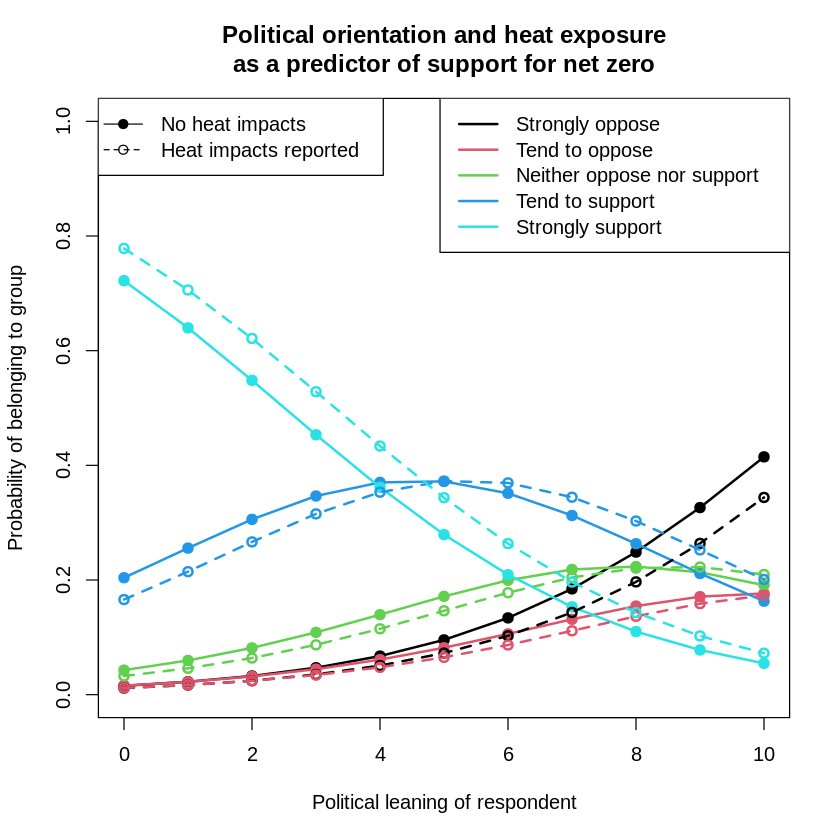

In [19]:
pred_pshi <- predict(olr_pshi, newdata = data.frame(Oct24Q31politicalspectrum = rep(0:10, 2), Oct24Q15ExperienceHealthImpactsYes = rep(0:1, each = 11)), type = "probs")

matplot(0:10, pred_pshi[1:11,], type = "o", lty = 1, lwd = 2, pch = 19, ylim = c(0,1),
        xlab = "Political leaning of respondent", ylab = "Probability of belonging to group", main = "Political orientation and heat exposure\nas a predictor of support for net zero")
legend("topright", lty = 1, lwd = 2, legend = nz_groups, col = 1:5)
legend("topleft", lty = c(1,2), pch = c(19,1), legend = c("No heat impacts", "Heat impacts reported"))
matplot(0:10, pred_pshi[12:22,], type = "o", lty = 2, lwd = 2, pch = 1, add = T)

In [20]:
df$pred <- paste0(df$Oct24Q31politicalspectrum, "_", df$Oct24Q15ExperienceHealthImpactsYes)

In [21]:
tbl <- table(df[!(is.na(df$Oct24Q31politicalspectrum) | is.na(df$Oct24Q15ExperienceHealthImpactsYes)),c("pred", "Oct24Q19NetZerosupportnumeric")])

In [22]:
tbl_0 <- tbl[sapply(strsplit(rownames(tbl),"_"), "[", 2) == "0",]
rownames(tbl_0) <- as.integer(sapply(strsplit(rownames(tbl_0),"_"), "[", 1))
tbl_0 <- sweep(tbl_0, 1, rowSums(tbl_0), "/")

tbl_1 <- tbl[sapply(strsplit(rownames(tbl),"_"), "[", 2) == "1",]
rownames(tbl_1) <- as.integer(sapply(strsplit(rownames(tbl_1),"_"), "[", 1))
tbl_1 <- sweep(tbl_1, 1, rowSums(tbl_1), "/")

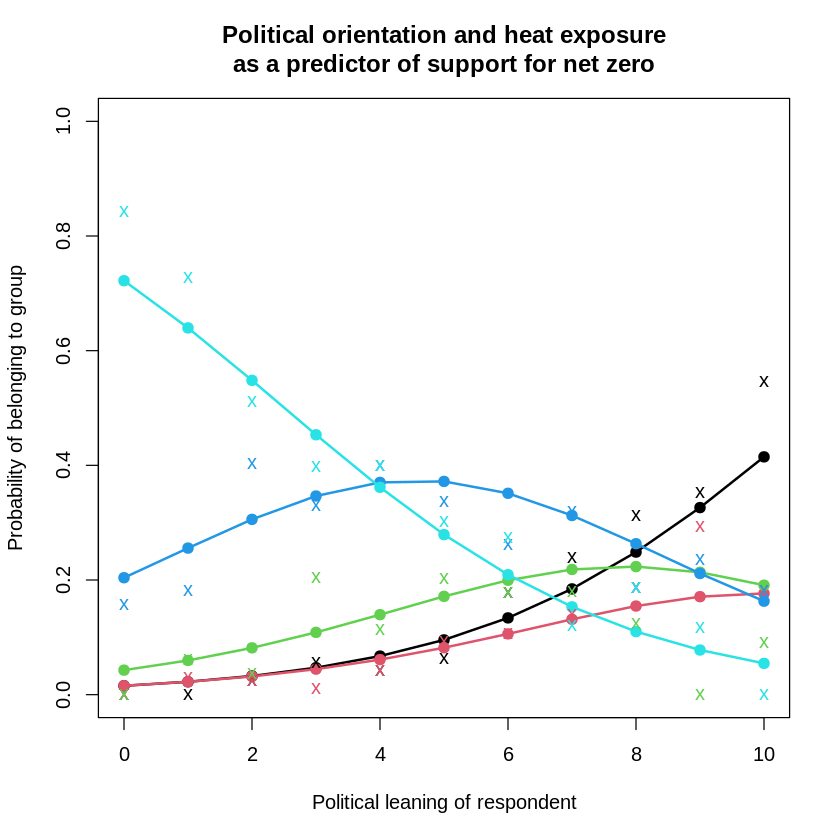

In [23]:
matplot(0:10, pred_pshi[1:11,], type = "o", lty = 1, lwd = 2, pch = 19, ylim = c(0,1),
        xlab = "Political leaning of respondent", ylab = "Probability of belonging to group", main = "Political orientation and heat exposure\nas a predictor of support for net zero")
matplot(rownames(tbl_0), sweep(tbl_0, 1, rowSums(tbl_0), "/"), add = T, pch = "x")

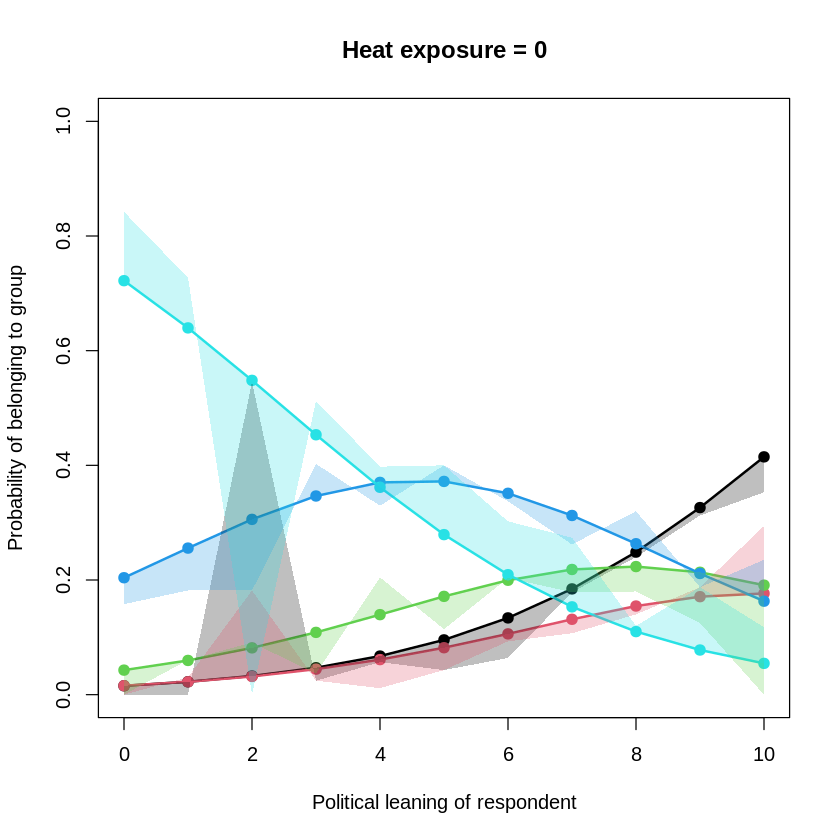

In [24]:
matplot(0:10, pred_pshi[1:11,], type = "o", lty = 1, lwd = 2, pch = 19, ylim = c(0,1),
        xlab = "Political leaning of respondent", ylab = "Probability of belonging to group", main = "Heat exposure = 0")
for(i in 1:5) {
    polygon(x = c(0:10,10:0), y = c(pred_pshi[1:11,i], rev(tbl_0[,i])), border = NA, col = adjustcolor(i, alpha = 0.25))
}

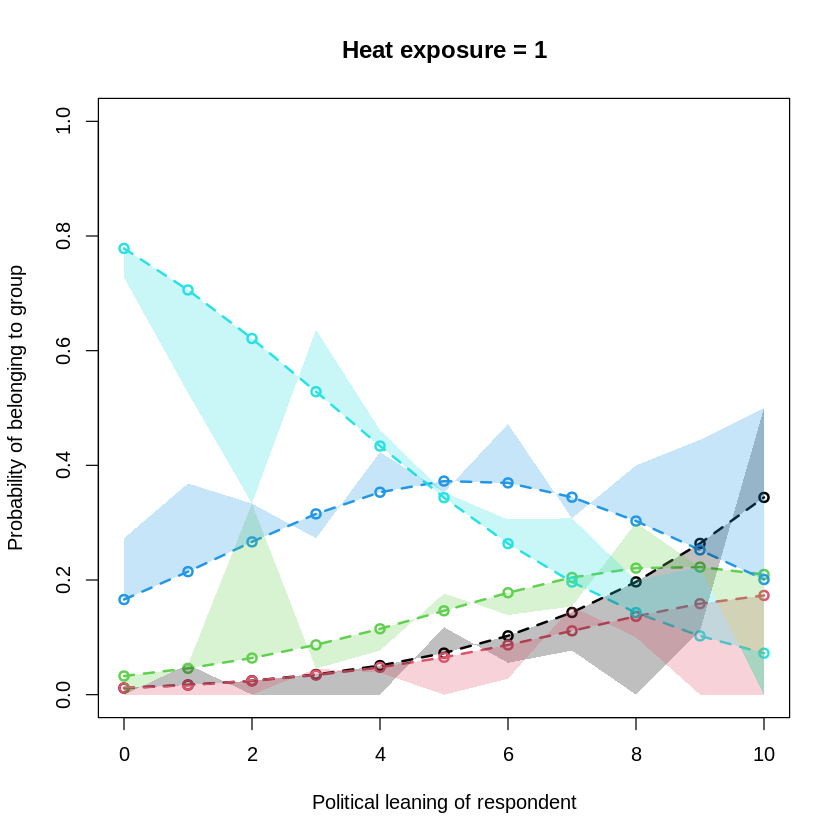

In [25]:
matplot(0:10, pred_pshi[12:22,], type = "o", lty = 2, lwd = 2, pch = 1, ylim = c(0,1),
        xlab = "Political leaning of respondent", ylab = "Probability of belonging to group", main = "Heat exposure = 1")
for(i in 1:5) {
    polygon(x = c(0:10,10:0), y = c(pred_pshi[12:22,i], rev(tbl_1[,i])), border = NA, col = adjustcolor(i, alpha = 0.25))
}

In [26]:
tbl <- table(df[!(is.na(df$Oct24Q31politicalspectrum) | is.na(df$Oct24Q15ExperienceHealthImpactsYes)),c("pred", "Oct24Q19NetZerosupportnumeric")])

In [31]:
df$lcr <- findInterval(df$Oct24Q31politicalspectrum, c(0,2.5,7.5,11))

In [69]:
tbl0 <- table(df[df$Oct24Q15ExperienceHealthImpactsYes == "0",c("lcr", "Oct24Q19NetZerosupportnumeric")])[,5:1]
tbl1 <- table(df[df$Oct24Q15ExperienceHealthImpactsYes == "1",c("lcr", "Oct24Q19NetZerosupportnumeric")])[,5:1]


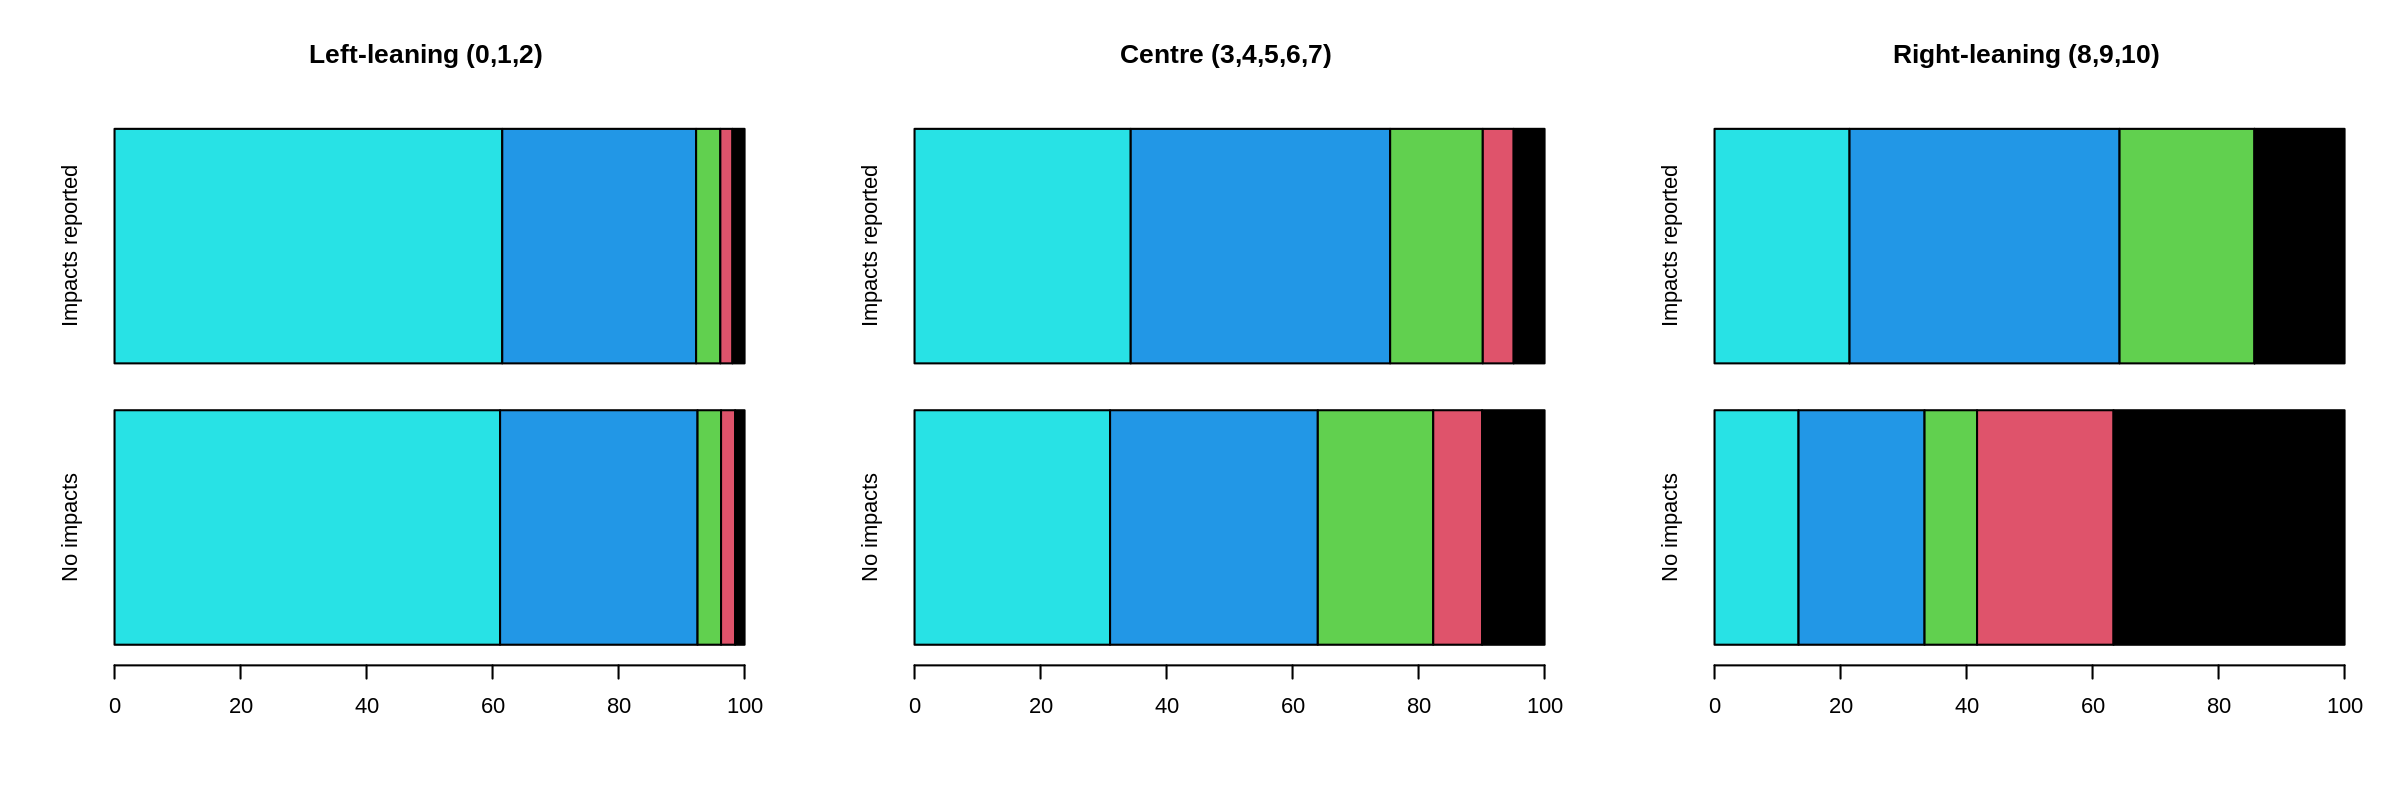

In [90]:
rwwa::prep_window(c(1,3))
for(i in 1:3) {
    barplot(cbind("No impacts" = tbl0[i,] / sum(tbl0[i,]), "Impacts reported" = tbl1[i,] / sum(tbl1[i,])) * 100, horiz = T,
           col = 5:1, main = c("Left-leaning (0,1,2)", "Centre (3,4,5,6,7)", "Right-leaning (8,9,10)")[i])
}

In [92]:
tbl1

   Oct24Q19NetZerosupportnumeric
lcr  5  4  3  2  1
  1 32 16  2  1  1
  2 35 42 15  5  5
  3  3  6  3  0  2

# Predicting support for Labour policies

## Compare predictors

In [5]:
df = read.csv("~/Downloads/20241217 October 2024 survey.csv")
gov_groups = c("1","2","3")

In [6]:
olr_age <- polr(as.factor(Oct24Q26LabourgovernmentadaptationactionExcludingDontknow) ~ Age, data = df, Hess = T)
pred_age <- predict(olr_age, newdata = data.frame(Age = 18:88), type = "probs")

olr_agegroups <- polr(as.factor(Oct24Q26LabourgovernmentadaptationactionExcludingDontknow) ~ Agegroup, data = df)
pred_agegroups <- predict(olr_agegroups, newdata = data.frame(Agegroup = levels(as.factor(df$Agegroup))[2:7]), type = "probs")

olr_sex <- polr(as.factor(Oct24Q26LabourgovernmentadaptationactionExcludingDontknow) ~ Sex, data = df)
pred_sex <- predict(olr_sex, newdata = data.frame(Sex = c("Female", "Male")), type = "probs")

olr_eth <- polr(as.factor(Oct24Q26LabourgovernmentadaptationactionExcludingDontknow) ~ Ethnicity_ethnic_minority, data = df)
pred_eth <- predict(olr_eth, newdata = data.frame(Ethnicity_ethnic_minority = c(0, 1)), type = "probs")

olr_ps <- polr(as.factor(Oct24Q26LabourgovernmentadaptationactionExcludingDontknow) ~ Oct24Q31politicalspectrum, data = df)
pred_ps <- predict(olr_ps, newdata = data.frame(Oct24Q31politicalspectrum = 0:10), type = "probs")

olr_hi <- polr(as.factor(Oct24Q26LabourgovernmentadaptationactionExcludingDontknow) ~ Oct24Q15ExperienceHealthImpactsYes, data = df)
pred_hi <- predict(olr_hi, newdata = data.frame(Oct24Q15ExperienceHealthImpactsYes = 0:1), type = "probs")

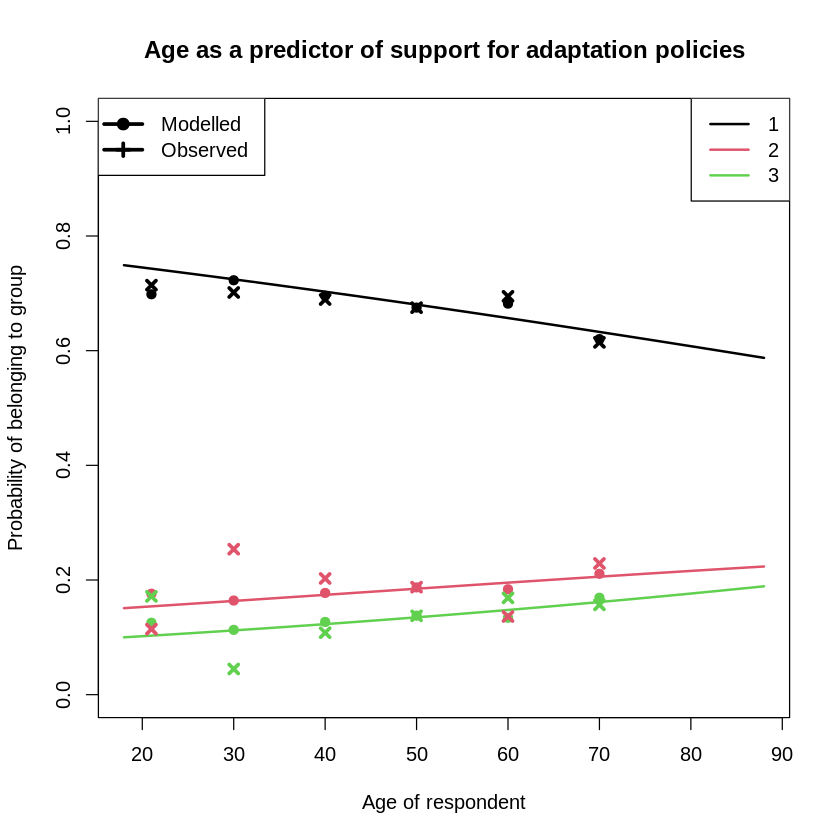

In [27]:
# ages vs age groups
tbl <- table(df[,c("Oct24Q26LabourgovernmentadaptationactionExcludingDontknow", "Agegroup")])

matplot(18:88, pred_age, type = "l", lty = 1, lwd = 2, ylim = c(0,1),
        xlab = "Age of respondent", ylab = "Probability of belonging to group", main = "Age as a predictor of support for adaptation policies")
matplot(c(21,30,40,50,60,70), pred_agegroups, pch = 19, col = 1:3, add = T)
matplot(c(21,30,40,50,60,70), t(sweep(tbl, 2, colSums(tbl), "/"))[-1,], pch = 4, lwd = 3, add = T)
legend("topright", lty = 1, lwd = 2, legend = gov_groups, col = 1:3)
legend("topleft", pch = c(19,3), lwd = 3, legend = c("Modelled", "Observed"))

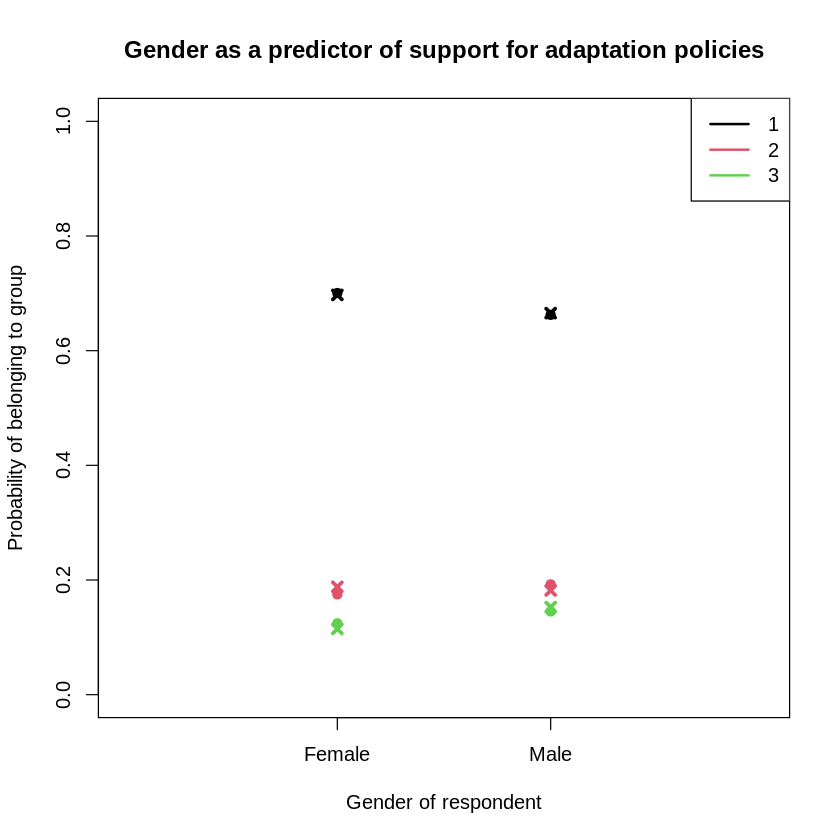

In [28]:
tbl <- table(df[,c("Oct24Q26LabourgovernmentadaptationactionExcludingDontknow", "Sex")])

matplot(1:2, pred_sex, pch = 19, xlim = c(0,3), ylim = c(0,1), xaxt = "n",
        xlab = "Gender of respondent", ylab = "Probability of belonging to group", main = "Gender as a predictor of support for adaptation policies")
axis(1, at = 1:2, labels = c("Female", "Male"))
matplot(c(1:2), t(sweep(tbl, 2, colSums(tbl), "/"))[-1,], pch = 4, lwd = 3, add = T)
legend("topright", lty = 1, lwd = 2, legend = gov_groups, col = 1:3)

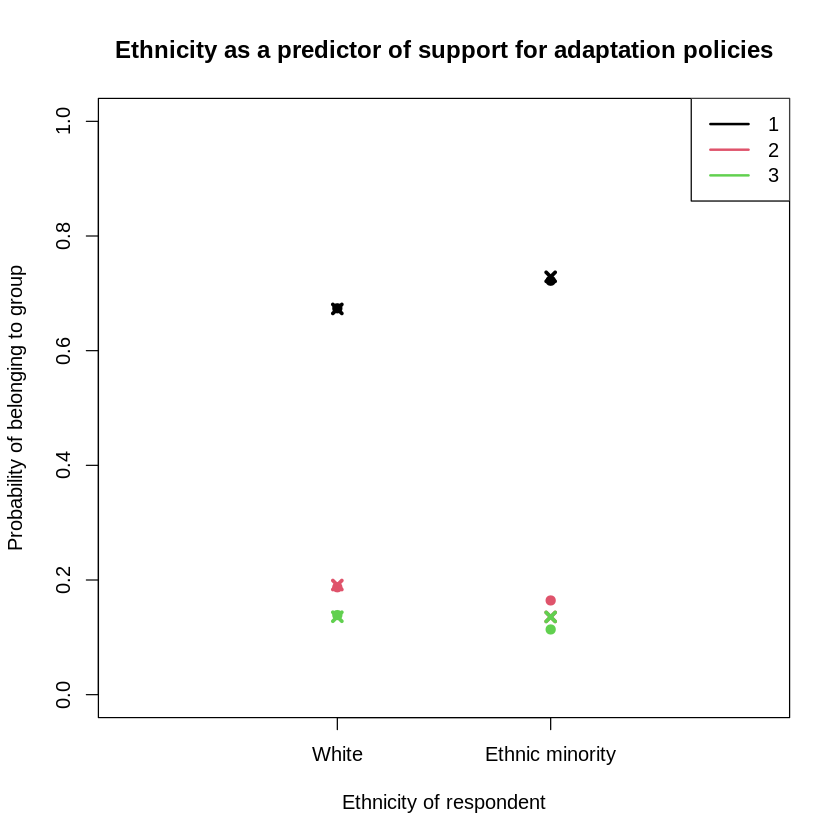

In [45]:
tbl <- table(df[,c("Oct24Q26LabourgovernmentadaptationactionExcludingDontknow", "Ethnicity_ethnic_minority")])

matplot(1:2, pred_eth, pch = 19, xlim = c(0,3), ylim = c(0,1), xaxt = "n",
        xlab = "Ethnicity of respondent", ylab = "Probability of belonging to group", main = "Ethnicity as a predictor of support for adaptation policies")
axis(1, at = 1:2, labels = c("White", "Ethnic minority"))
matplot(c(1:2), t(sweep(tbl, 2, colSums(tbl), "/")), pch = 4, lwd = 3, add = T)
legend("topright", lty = 1, lwd = 2, legend = gov_groups, col = 1:3)

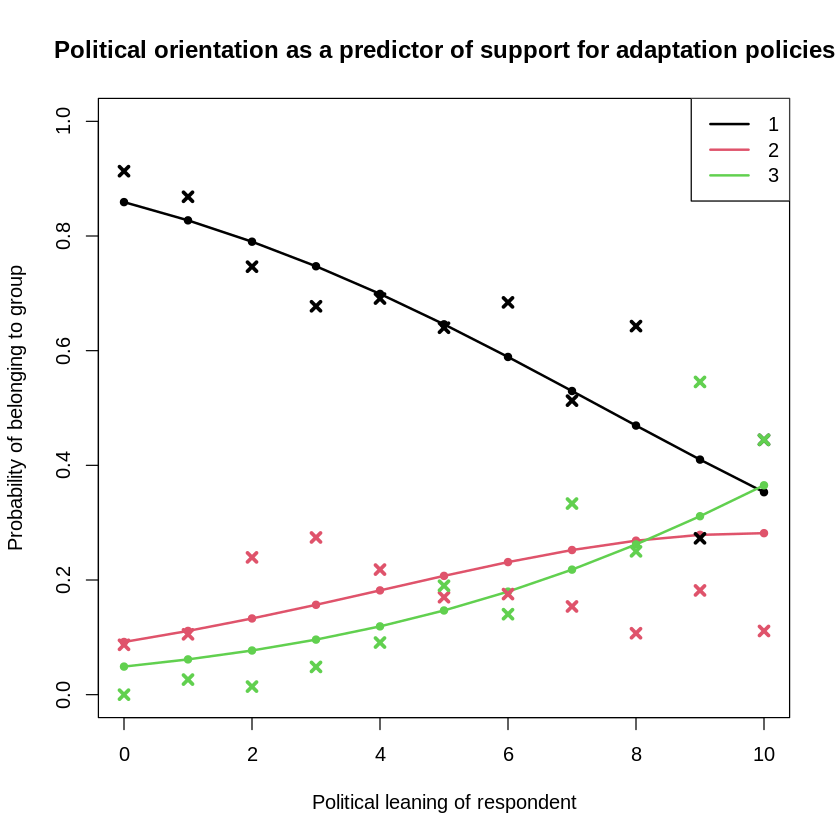

In [37]:
tbl <- table(df[,c("Oct24Q26LabourgovernmentadaptationactionExcludingDontknow", "Oct24Q31politicalspectrum")])

matplot(0:10, pred_ps, pch = 20, type = "o", lty = 1, lwd = 2, ylim = c(0,1), 
        xlab = "Political leaning of respondent", ylab = "Probability of belonging to group", main = "Political orientation as a predictor of support for adaptation policies")
legend("topright", lty = 1, lwd = 2, legend = gov_groups, col = 1:5)
matplot(0:10, t(sweep(tbl, 2, colSums(tbl), "/")), pch = 4, lwd = 3, add = T)


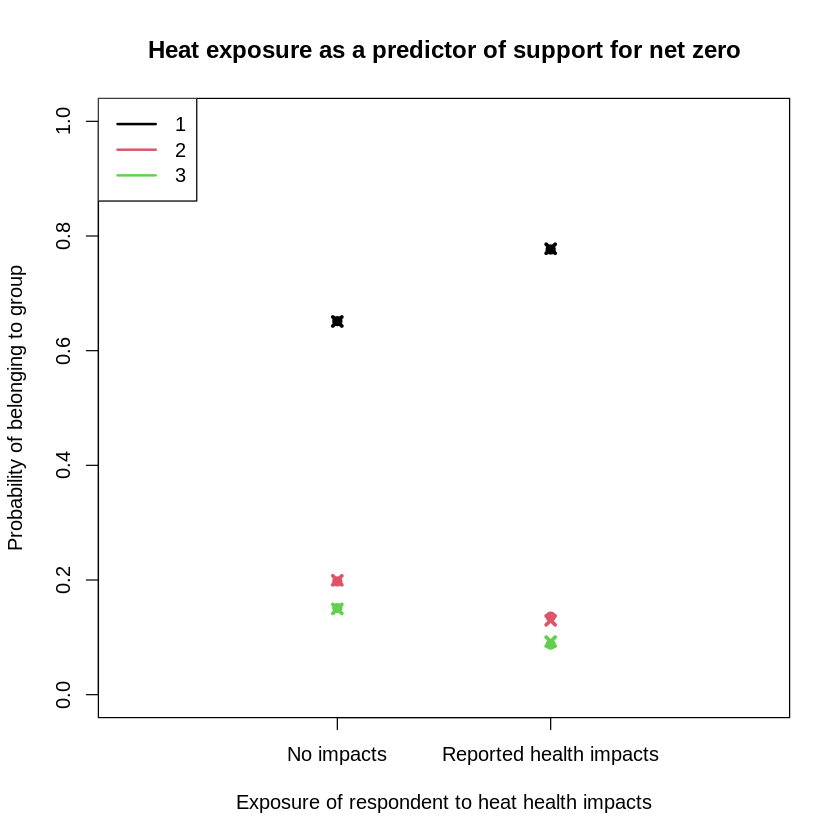

In [44]:
tbl <- table(df[,c("Oct24Q26LabourgovernmentadaptationactionExcludingDontknow", "Oct24Q15ExperienceHealthImpactsYes")])

matplot(1:2, pred_hi, pch = 19, xlim = c(0,3), ylim = c(0,1), xaxt = "n",
        xlab = "Exposure of respondent to heat health impacts", ylab = "Probability of belonging to group", main = "Heat exposure as a predictor of support for net zero")
axis(1, at = 1:2, labels = c("No impacts", "Reported health impacts"))
matplot(c(1:2), t(sweep(tbl, 2, colSums(tbl), "/")), pch = 4, lwd = 3, add = T)
legend("topleft", lty = 1, lwd = 2, legend = gov_groups, col = 1:3)

## Fit and compare models

In [46]:
olr_all <- polr(as.factor(Oct24Q26LabourgovernmentadaptationactionExcludingDontknow) ~ Oct24Q15ExperienceHealthImpactsYes + Age + Oct24Q31politicalspectrum, data = df, Hess = T)

olr_hiage <- polr(as.factor(Oct24Q26LabourgovernmentadaptationactionExcludingDontknow) ~ Oct24Q15ExperienceHealthImpactsYes + Age, data = df, Hess = T)
olr_ageps <- polr(as.factor(Oct24Q26LabourgovernmentadaptationactionExcludingDontknow) ~ Age + Oct24Q31politicalspectrum, data = df, Hess = T)
olr_pshi <- polr(as.factor(Oct24Q26LabourgovernmentadaptationactionExcludingDontknow) ~ Oct24Q31politicalspectrum + Oct24Q15ExperienceHealthImpactsYes, data = df, Hess = T)

olr_hi <- polr(as.factor(Oct24Q26LabourgovernmentadaptationactionExcludingDontknow) ~ Oct24Q15ExperienceHealthImpactsYes, data = df, Hess = T)
olr_age <- polr(as.factor(Oct24Q26LabourgovernmentadaptationactionExcludingDontknow) ~ Age, data = df, Hess = T)
olr_ps <- polr(as.factor(Oct24Q26LabourgovernmentadaptationactionExcludingDontknow) ~ Oct24Q31politicalspectrum, data = df, Hess = T)

In [47]:
models = list("all" = olr_all, "hi+age" = olr_hiage, "age+ps" = olr_ageps, "ps+hi" = olr_pshi, "hi" = olr_hi, "age" = olr_age, "ps" = olr_ps)

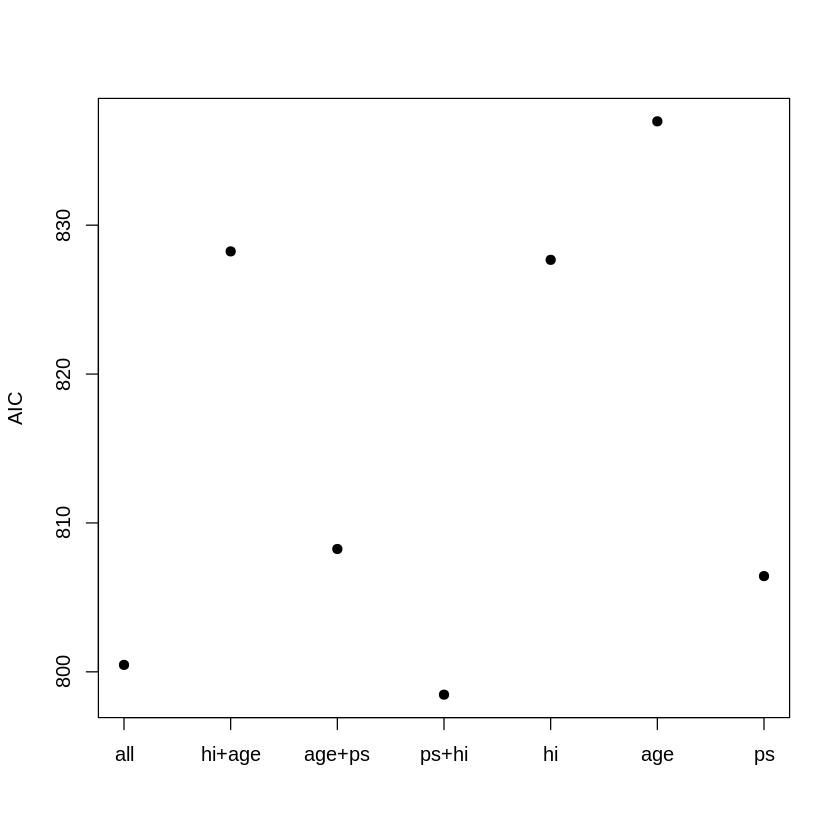

In [48]:
plot(sapply(models, AIC), xaxt = "n", pch = 19, xlab = "", ylab = "AIC")
axis(1, at = 1:7, labels = names(models))

In [49]:
coefficients <- summary(olr_pshi)$coefficients
coefficients <- cbind(coefficients, p_value = (1 - pnorm(abs(coefficients[ ,"t value"]), 0, 1))*2)
coefficients <- cbind(coefficients, odds_ratio = exp(coefficients[ ,"Value"]))
printCoefmat(coefficients[ ,c("Value", "Std. Error", "odds_ratio", "p_value")], P.values=TRUE, has.Pvalue=TRUE, dig.tst = 3)

                                       Value Std. Error odds_ratio  p_value    
Oct24Q31politicalspectrum           0.235634   0.043165      1.266 4.79e-08 ***
Oct24Q15ExperienceHealthImpactsYes -0.557925   0.260107      0.572    0.032 *  
1|2                                 1.672322   0.228456      5.325 2.48e-13 ***
2|3                                 2.832499   0.255231     16.988  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


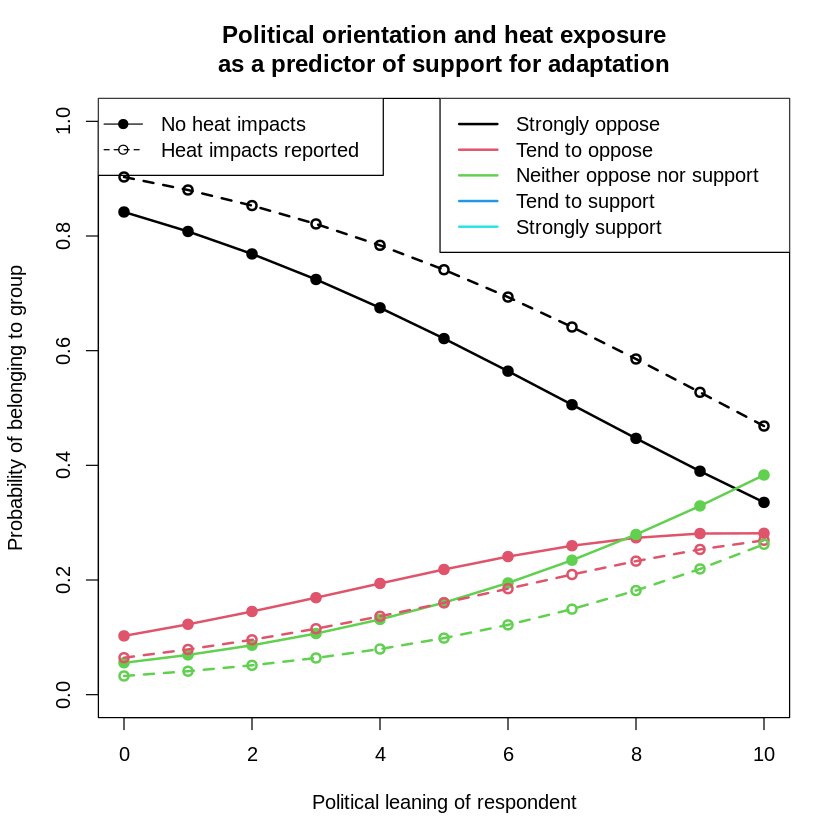

In [50]:
pred_pshi <- predict(olr_pshi, newdata = data.frame(Oct24Q31politicalspectrum = rep(0:10, 2), Oct24Q15ExperienceHealthImpactsYes = rep(0:1, each = 11)), type = "probs")

matplot(0:10, pred_pshi[1:11,], type = "o", lty = 1, lwd = 2, pch = 19, ylim = c(0,1),
        xlab = "Political leaning of respondent", ylab = "Probability of belonging to group", main = "Political orientation and heat exposure\nas a predictor of support for adaptation")
legend("topright", lty = 1, lwd = 2, legend = nz_groups, col = 1:5)
legend("topleft", lty = c(1,2), pch = c(19,1), legend = c("No heat impacts", "Heat impacts reported"))
matplot(0:10, pred_pshi[12:22,], type = "o", lty = 2, lwd = 2, pch = 1, add = T)

In [51]:
df$pred <- paste0(df$Oct24Q31politicalspectrum, "_", df$Oct24Q15ExperienceHealthImpactsYes)

In [58]:
tbl <- table(df[!(is.na(df$Oct24Q31politicalspectrum) | is.na(df$Oct24Q15ExperienceHealthImpactsYes)),c("pred", "Oct24Q26LabourgovernmentadaptationactionExcludingDontknow")])

In [59]:
tbl_0 <- tbl[sapply(strsplit(rownames(tbl),"_"), "[", 2) == "0",]
rownames(tbl_0) <- as.integer(sapply(strsplit(rownames(tbl_0),"_"), "[", 1))
tbl_0 <- sweep(tbl_0, 1, rowSums(tbl_0), "/")

tbl_1 <- tbl[sapply(strsplit(rownames(tbl),"_"), "[", 2) == "1",]
rownames(tbl_1) <- as.integer(sapply(strsplit(rownames(tbl_1),"_"), "[", 1))
tbl_1 <- sweep(tbl_1, 1, rowSums(tbl_1), "/")

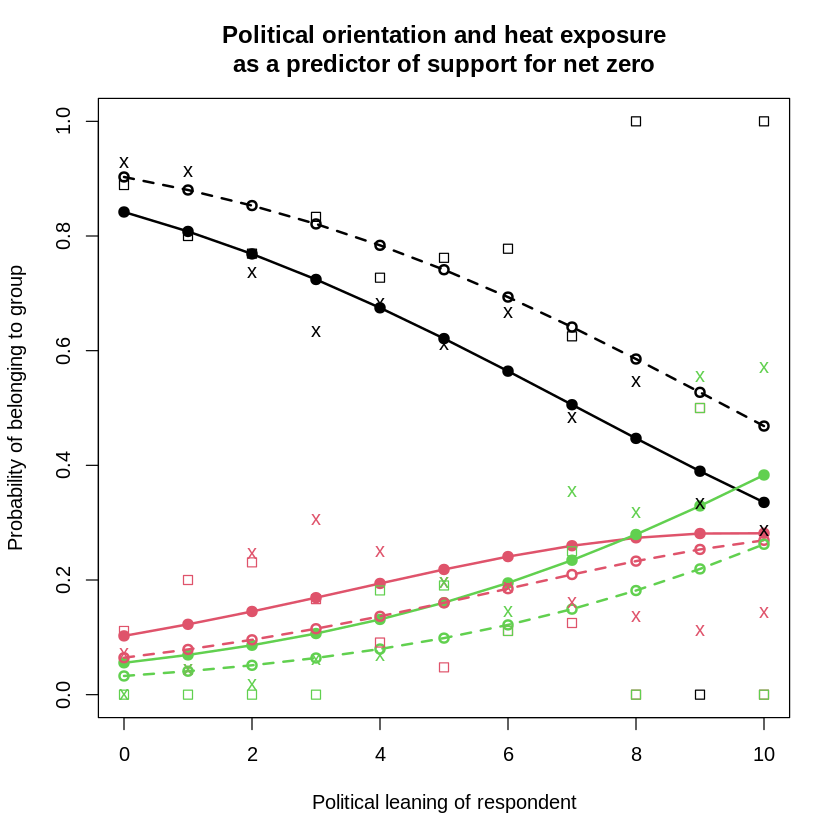

In [65]:
matplot(0:10, pred_pshi[1:11,], type = "o", lty = 1, lwd = 2, pch = 19, ylim = c(0,1),
        xlab = "Political leaning of respondent", ylab = "Probability of belonging to group", main = "Political orientation and heat exposure\nas a predictor of support for net zero")
matplot(0:10, pred_pshi[12:22,], type = "o", lty = 2, lwd = 2, pch = 1, add = T)
matplot(rownames(tbl_0), sweep(tbl_0, 1, rowSums(tbl_0), "/"), add = T, pch = "x")
matplot(rownames(tbl_1), sweep(tbl_1, 1, rowSums(tbl_1), "/"), add = T, pch = 0)

## Tabulate proportions

In [66]:
tbl <- table(df[!(is.na(df$Oct24Q31politicalspectrum) | is.na(df$Oct24Q15ExperienceHealthImpactsYes)),c("pred", "Oct24Q26LabourgovernmentadaptationactionExcludingDontknow")])

In [67]:
df$lcr <- findInterval(df$Oct24Q31politicalspectrum, c(0,2.5,7.5,11))

In [71]:
tbl0 <- table(df[df$Oct24Q15ExperienceHealthImpactsYes == "0",c("lcr", "Oct24Q26LabourgovernmentadaptationactionExcludingDontknow")])
tbl1 <- table(df[df$Oct24Q15ExperienceHealthImpactsYes == "1",c("lcr", "Oct24Q26LabourgovernmentadaptationactionExcludingDontknow")])

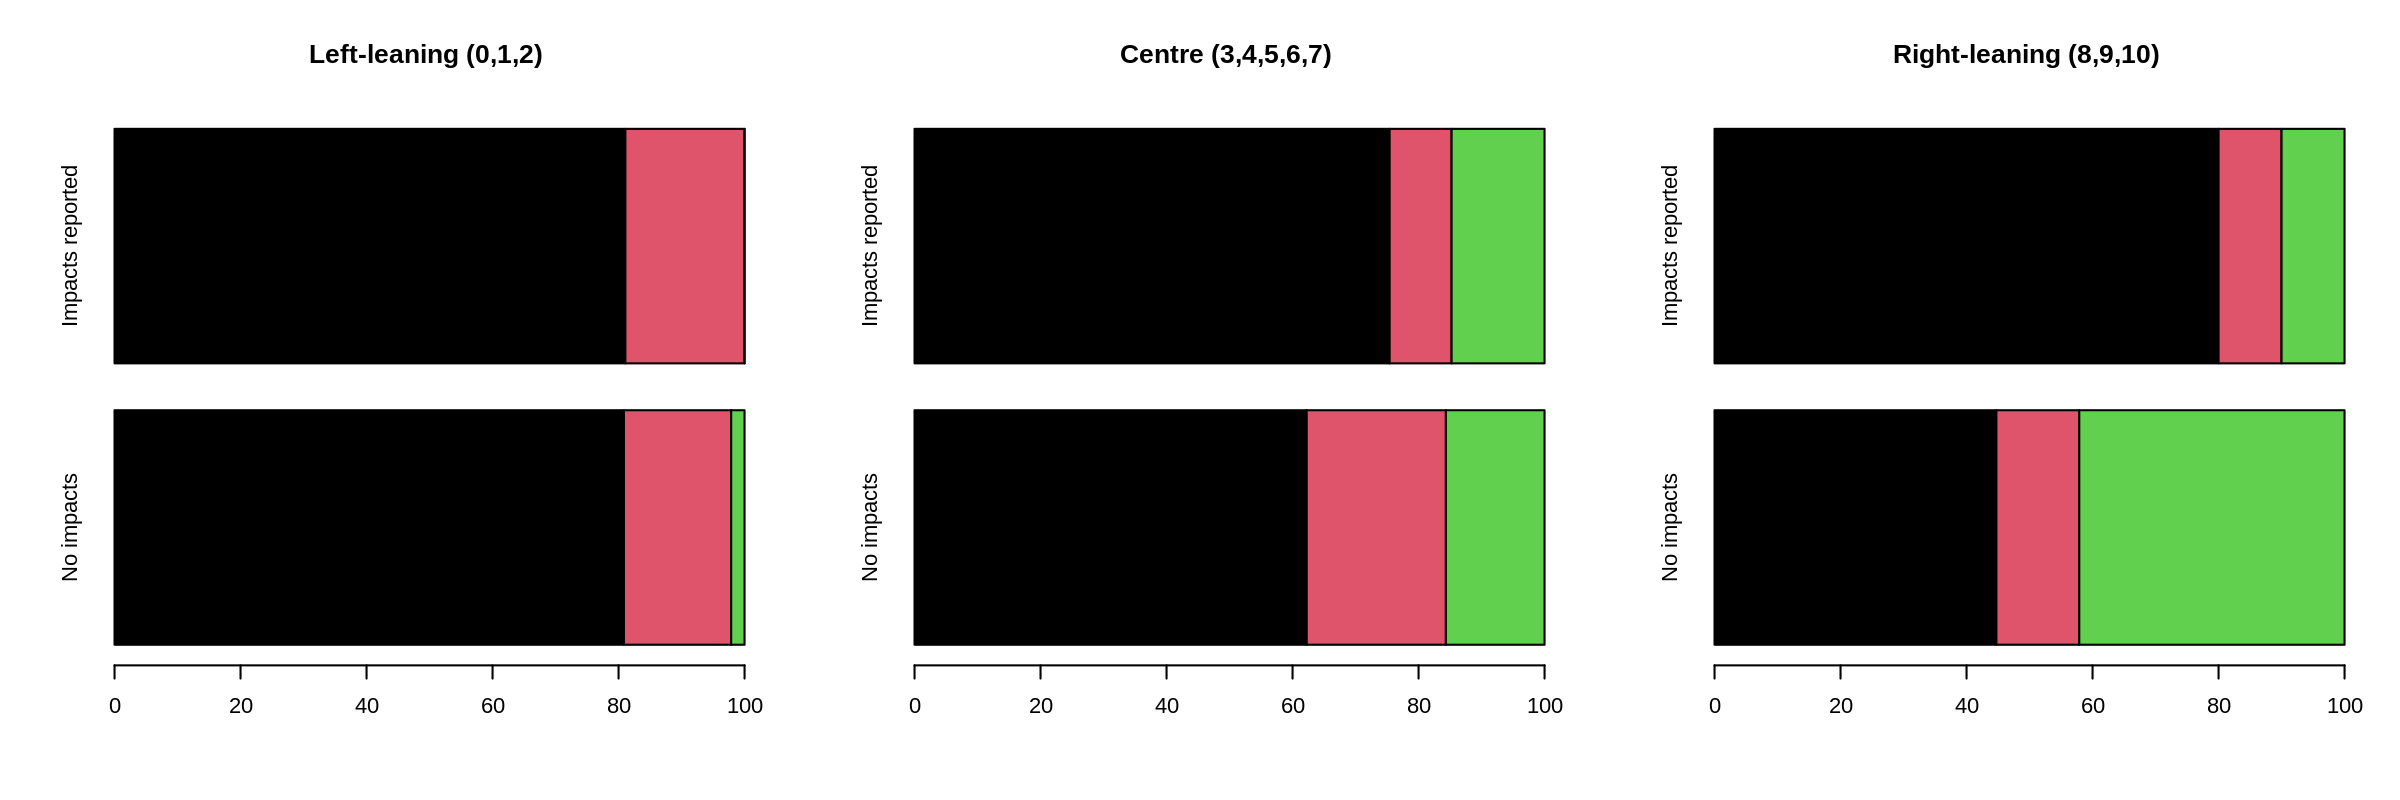

In [72]:
rwwa::prep_window(c(1,3))
for(i in 1:3) {
    barplot(cbind("No impacts" = tbl0[i,] / sum(tbl0[i,]), "Impacts reported" = tbl1[i,] / sum(tbl1[i,])) * 100, horiz = T,
           col = 1:3, main = c("Left-leaning (0,1,2)", "Centre (3,4,5,6,7)", "Right-leaning (8,9,10)")[i])
}